In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("testdata/KaggleV2-May-2016.csv")
combine = [df]

In [4]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [5]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


# 課題

In [6]:
noshow_d = dict({"Yes" : "Show", "No" : "No-show"})
noshow_d

{'No': 'No-show', 'Yes': 'Show'}

In [7]:
len(df)

110527

In [8]:
for dataset in combine:    
    dataset['No-show'] = dataset['No-show'].map(noshow_d)

In [9]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No-show
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No-show


In [10]:
no_show_dum = pd.get_dummies(df['No-show'])
df_proc = pd.concat((df,no_show_dum),axis=1)
df_proc.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'No-show', 'Show'],
      dtype='object')

In [11]:
df_proc = df_proc.drop('No-show',axis=1)

In [12]:
df_proc.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Show'],
      dtype='object')

In [24]:
df_proc_show = df_proc[df_proc['Show'] == 1].loc[:,('Show','AppointmentDay')].groupby("AppointmentDay", as_index=False).count()
df_proc_noshow = df_proc[df_proc['Show'] == 0].loc[:,('Show','AppointmentDay')].groupby("AppointmentDay", as_index=False).count()

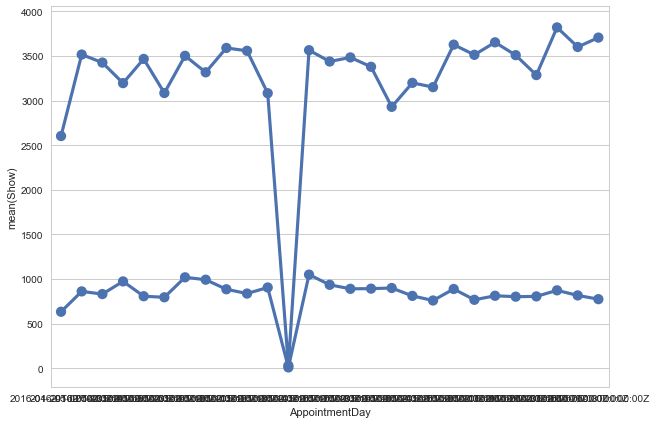

In [35]:
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
ax1 = sns.pointplot(x="AppointmentDay", y = "Show", data = df_proc_show)
ax2 = sns.pointplot(x="AppointmentDay", y = "Show", data = df_proc_noshow)
plt.show()

# データフレームの作成

In [15]:
df = pd.read_csv("testdata/KaggleV2-May-2016.csv")

In [16]:
## データフレーム作成
feature_dframe = pd.DataFrame()
feature_dframe['Age'] = df['Age']
feature_dframe['Patientld'] = df['PatientId']
feature_dframe['AppointmentID'] = df['AppointmentID']
feature_dframe['Gender'] = df['Gender'].apply(lambda g:1 if g == 'M' else 0)
feature_dframe['SMS_received'] = df['SMS_received']
feature_dframe['Handcap'] = df['Handcap']
feature_dframe['Alcoholism'] = df['Alcoholism']
feature_dframe['Diabetes'] = df['Diabetes']
feature_dframe['Hipertension'] = df['Hipertension']
feature_dframe['Scholarship'] = df['Scholarship']
feature_dframe['No-show'] = df['No-show'].apply(lambda g:1 if g == 'Yes' else 0)

In [17]:
feature_dframe.tail()

,Age,Patientld,AppointmentID,Gender,SMS_received,Handcap,Alcoholism,Diabetes,Hipertension,Scholarship,No-show
110522,56,2.572134e+12,5651768,0,1,0,0,0,0,0,0
110523,51,3.596266e+12,5650093,0,1,0,0,0,0,0,0
110524,21,1.557663e+13,5630692,0,1,0,0,0,0,0,0
110525,38,9.213493e+13,5630323,0,1,0,0,0,0,0,0
110526,54,3.775115e+14,5629448,0,1,0,0,0,0,0,0


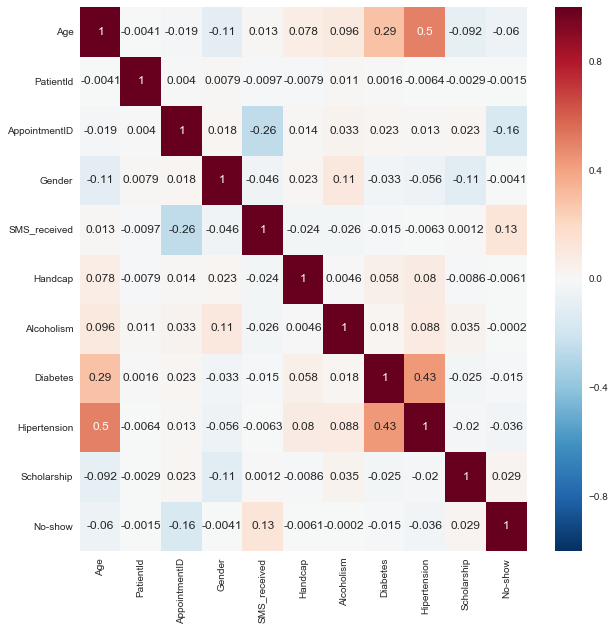

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(feature_dframe.corr(), annot=True)
plt.show()

今回の分析とは関係ないですが、年齢と高血圧、糖尿病と高血圧の相関が高いことが確認することができます。

# ランダムフォレスト

In [19]:
X = feature_dframe.drop('No-show', axis=1)
X = X.as_matrix()
y = feature_dframe['No-show']

In [20]:
y.dtype

dtype('int64')

In [21]:
#データをわける
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                  train_size=0.7,
                  test_size=0.3,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=15,criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.82070106504
0.800054283905


In [26]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth=15, criterion='entropy',random_state=0)
tree_clf.fit(X_train,y_train)

print(tree_clf.score(X_train, y_train))
print(tree_clf.score(X_test, y_test))

0.826426946541
0.787388039446
